<a href="https://colab.research.google.com/github/gelabgaboo/ACP-peptide/blob/main/Kalman_filter_Homework_Gabriel_Gelabert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The section is from the recursive bayesina estimation examples about the ninja and the quail. Here we will be showing that how looping through bayes theroem we can create a more accurate probability distribution. This is done by calculating the hypothesis at a given time point given our current dataset/information. Once new data, in this case a new 'squawk' is made we can re evaluate our hypothesis of where the quail is. By taking the probability of our prior hypothesis or expectation and calulating our new hypothesis of the quails location given our new data we can create a new probability distribution of where the quail may be. By iterating though this cycle many times we are able to create a more accurate proability distribuition to find the location of the quail.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


N = 100  # number of trials/ guesses to iterate through
#s = np.array([np.random.randint(9), np.random.randint(9)]) # creates a random location for the our quail
s = np.array([3,5]) # sets quail at location 3,5
n = 2 * np.random.randn(1, N)   # creates a vector of 100 squawks that has a standard deviation of 2
x = np.zeros((2, N)) # creates an array of 0s, this is also the initial guess of the ninja

plt.plot(s[0], s[1], 'r.', markersize=40, linewidth=3)
plt.axis([0, 10, 0, 10])

for i in range(N):
  x[:, i] = s + n[:, i]
  plt.plot(x[0, i], x[1, i], 'k.', markersize=10)
  #plt.pause(.01)
plt.show()


In [ ]:
plt.plot(s[0], s[1], 'r.', markersize=40, linewidth=3)

In [ ]:
from sys import platlibdir
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)
plt.clf()

N = 100  # number of trials/ guesses to iterate through
#s = np.array([np.random.randint(9), np.random.randint(9)]) # creates a random location for the our quail
s = np.array([3,5]) # sets quail at location 3,5
n = 2 * np.random.randn(1, N)   # creates a vector of 100 squawks that has a standard deviation of 2
x = np.zeros((2, N)) # creates an array of 0s, this is also the initial guess of the ninja

plt.figure(1)
plt.plot(s[0], s[1], 'r.', markersize=40, linewidth=3)
plt.axis([0, 10, 0, 10])

for i in range(N):
    x[:, i] = s + n[:, i]
    plt.plot(x[0, i], x[1, i], 'k.', markersize=10)
    plt.pause(.1)


plt.show()


Sa = np.arange(2, 4, 0.05) # location of where the quail can be at
Sb = np.arange(4, 6, 0.05) # locaiton of where the quail can be at

# no bias and no prior knowledge, go assume a uniform distribution
L = len(Sa)
Pr = np.ones((L, L))  # initialize a uniform prior expectation
Po = np.ones((L, L))  # setting to ones so that are next prior expectation will be updated


Pr = Pr/np.sum(Pr) # create a pmf with the prior expectation
Po = Po/np.sum(Po) # normalizes the values of the updated prior expectaitons

plt.figure(1)
plt.clf()
ax = plt.subplot(1,1,1, projection = '3d')
Sa, Sb = np.meshgrid(Sa, Sb)
ax.plot_surface(Pr, Pr, Po, cmap = 'plasma' )
ax.set_xlabel('Sa')
ax.set_ylabel('Sb')
ax.set_zlabel('Po')
ax.set_zlim(0,0.015)
ax.set_xlim(0,40)
ax.set_ylim(0,40)

plt.show()

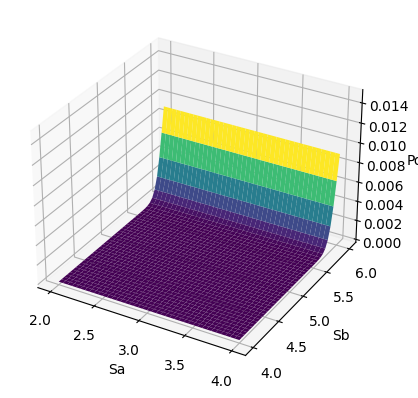

(20,)


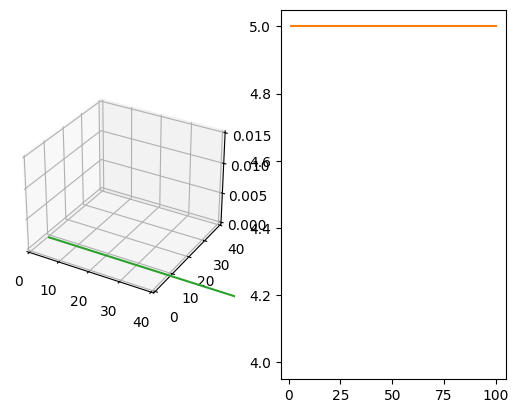

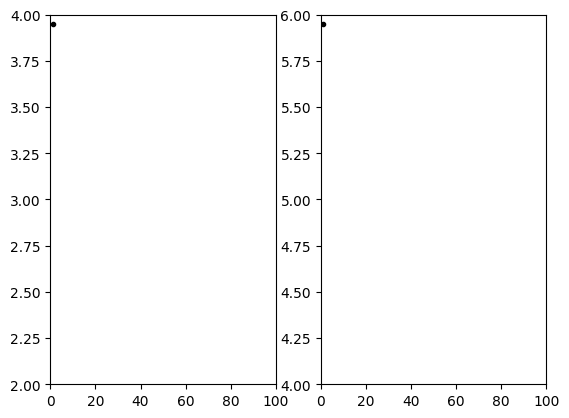

In [ ]:

ax1 = plt.subplot(1,2,1, projection='3d')
z = np.arange(0,1,.05)
print(np.shape(z))
ax1.plot_surface(Po,Po,Pr)
ax1.set_xlim(0, 40)
ax1.set_ylim(0, 40)
ax1.set_zlim(0, 0.015)
a, b = np.where(Po == np.max(Po))
sest = np.array([Sa[a[0]], Sb[b[0]]])


ax1 = plt.subplot(1,2,1)
ax1.plot(1, sest[0])
ax1.plot([1, N], [s[0], s[0]])

ax2 = plt.subplot(1,2,2)
ax2.plot(1, sest[1])
ax2.plot([1, N], [s[1], s[1]])

K = np.array([[4, 0], [0, 4]])

for n in range(1, len(x)):
    Pr = Po.copy()
    m = np.zeros_like(Pr)
    for i in range(len(Pr)):
        for j in range(len(Pr)):
            me = np.array([Sa[i], Sb[j]])
            m[i, j] = 1 / np.sqrt((2 * np.pi) ** 2 * np.linalg.det(K)) * np.exp(
                -np.dot((x[:, n] - me).T, np.linalg.inv(K)).dot(x[:, n] - me) / 2)
            m[i, j] = m[i, j] * Pr[i, j]
    Po = m / np.sum(np.sum(m))
    ax1 = plt.subplot(1,2,1, projection='3d')
    ax1.plot_surface(Po,Pr,Pr)
    ax1.set_xlim(0, 40)
    ax1.set_ylim(0, 40)
    ax1.set_zlim(0, 0.015)

    fig2 = plt.figure(2)
    [a, b] = np.where(Po == np.max(Po))
    sest = np.array([Sa[a[0]], Sb[b[0]]])

    ax1 = plt.subplot(1,2,1)
    ax1.plot(n, sest[0], 'k.')
    ax1.set_xlim(0, N)
    ax1.set_ylim(2, 4)

    ax2 = plt.subplot(1,2,2)
    ax2.plot(n, sest[1], 'k.')
    ax2.set_xlim(0, N)
    ax2.set_ylim(4, 6)

    plt.pause(0.001)



AttributeError: ignored

<Figure size 640x480 with 0 Axes>

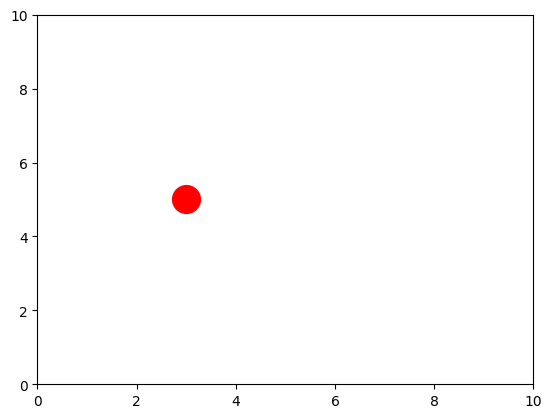

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Recursive Bayesian estimation example
np.random.seed(0)

# Initialize variables
N = 100
s = np.array([3, 5])  # Where the quail is hiding
n = 2 * np.random.randn(2, N)  # Vector of squawks with a standard deviation of 2
x = np.zeros((2, N))  # Initialize variable for the ninja's estimates

# Create plots
fig1 = plt.figure(1)
fig2 = plt.figure(2)

# Plot where the quail actually is
plt.figure(fig1)
plt.plot(s[0], s[1], 'r.', markersize=40, linewidth=3)
plt.axis([0, 10, 0, 10])
plt.hold(True)

for i in range(N):
    x[:, i] = s + n[:, i]
    plt.plot(x[0, i], x[1, i], 'k.', markersize=10)
    plt.pause(0.1)

# Define the locations the quail can be at
Sa = np.arange(2, 4.05, 0.05)
Sb = np.arange(4, 6.05, 0.05)

# No bias, no prior knowledge, uniform distribution
L = len(Sa)
Pr = np.ones((L, L))  # Initialize uniform prior
Po = np.copy(Pr)

Pr /= np.sum(Pr)  # Normalize prior to make it a probability mass function
Po /= np.sum(Po)

# Initialize plots
plt.figure(fig1)
plt.clf()
plt.figure(fig2)
plt.clf()

# Iterative Bayesian estimation
a, b = np.unravel_index(np.argmax(Po), Po.shape)
sest = np.array(Sa[a], Sb[b])

plt.figure(fig1)
plt.clf()
plt.figure(fig2)
plt.clf()

# Initialize plots for estimated positions
plt.subplot(211)
plt.plot(1, sest[0])
plt.hold(True)
plt.axhline(y=s[0], color='r')  # Draw a line at the x dimension
plt.subplot(212)
plt.plot(1, sest[1])
plt.hold(True)
plt.axhline(y=s[1], color='r')  # Draw a line at the y dimension

K = np.array([[4, 0], [0, 4]]).astype(float)  # Covariance matrix for a 2-D Gaussian

for n in range(1, len(x[0])):
    Pr = Po  # Store the posterior as the prior
    m = np.zeros_like(Pr)

    # Compute likelihood for each location
    for i in range(len(Pr)):
        for j in range(len(Pr)):
            me = np.array([Sa[i], Sb[j]])
            likelihood = (
                1 / np.sqrt((2 * np.pi) ** 2 * np.linalg.det(K))
                * np.exp(
                    -0.5
                    * np.dot(np.dot(x[:, n] - me, np.linalg.inv(K)), x[:, n] - me)
                )
            )
            m[i, j] = likelihood * Pr[i, j]

    Po = m / np.sum(m)  # Normalize to make it a proper probability distribution

    plt.figure(fig1)
    plt.clf()
    plt.imshow(Po, extent=[Sa[0], Sa[-1], Sb[0], Sb[-1]], origin='lower')
    plt.colorbar()

    a, b = np.unravel_index(np.argmax(Po), Po.shape)
    sest = np.array([Sa[a], Sb[b]])

    plt.figure(fig2)
    plt.subplot(211)
    plt.plot(n + 1, sest[0], 'k.')
    plt.axis([0, N, 2, 4])
    plt.subplot(212)
    plt.plot(n + 1, sest[1], 'k.')
    plt.axis([0, N, 4, 6])
    plt.pause(0.1)

plt.subplot(211)
plt.hold(False)
plt.subplot(212)
plt.hold(False)

plt.show()